In [75]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]


In [76]:
#Preliminary findings/visualization/hints were available in the starter notebook downloaded from Zindi's site
#For more info, see:
#https://zindi.africa/competitions/womxn-in-big-data-south-africa-female-headed-households-in-south-africa

#load in data and preview
df = pd.read_csv('Train.csv')
df.head(1)

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.2075,16.773757,0.933841,0.000846,0.00549,0.000676,0.0,0.001372,...,0.002848,0.007537,0.0,0.012928,0,0,ZA4161001,-29.68227,24.734743,0.292039


In [77]:

#Try to gleen information so as to be able to reduce redundant info
# arr = df.apply('nunique')
# summed = 0
#for z in arr:
    #print(df.columns[summed] + " " + str(z) )
    #summed = summed +1
    
#Note: this means little uniqueness in dw_12,dw_13, lan_13, pw_07, pw_08, so delete those
df = df.drop(['dw_12','dw_13', 'lan_13', 'pw_07', 'pw_08'], axis = 1)
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000


In [78]:
df.info()
#This confirms there are no null elements, and the dtypes make sense

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  psa_00             2822 

In [79]:
print(df.shape)
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)
print("ARE THERE NULL VALUES???")
print("-------------------")
print(df.isnull().sum())
#no duplicate rows were found

(2822, 58)
(0, 58)
ARE THERE NULL VALUES???
-------------------
ward                 0
total_households     0
total_individuals    0
target               0
dw_00                0
dw_01                0
dw_02                0
dw_03                0
dw_04                0
dw_05                0
dw_06                0
dw_07                0
dw_08                0
dw_09                0
dw_10                0
dw_11                0
psa_00               0
psa_01               0
psa_02               0
psa_03               0
psa_04               0
stv_00               0
stv_01               0
car_00               0
car_01               0
lln_00               0
lln_01               0
lan_00               0
lan_01               0
lan_02               0
lan_03               0
lan_04               0
lan_05               0
lan_06               0
lan_07               0
lan_08               0
lan_09               0
lan_10               0
lan_11               0
lan_12               0
lan_14          

In [80]:

df.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,lat,lon,NL
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000
mean,3665.281214,12869.130053,24.507554,0.712196,0.092616,0.032043,0.006057,0.008665,0.006289,0.022375,...,0.359691,0.329684,0.127555,0.041589,0.019655,0.011008,0.110818,-26.880740,28.666515,17.437560
std,3266.364522,9696.690518,10.294387,0.214035,0.182852,0.080253,0.019374,0.030697,0.024606,0.037127,...,0.304472,0.236642,0.156400,0.057331,0.032926,0.023672,0.185401,2.021279,2.373809,18.958621
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.490089,16.760022,0.000000
25%,1778.858235,7071.205695,16.751556,0.594212,0.002895,0.002407,0.000000,0.000000,0.000000,0.002716,...,0.087638,0.111282,0.008673,0.002099,0.000715,0.000159,0.005217,-28.569019,27.707932,3.033397
50%,2398.249935,9366.989680,24.156670,0.766841,0.010425,0.005762,0.000807,0.000607,0.000865,0.008639,...,0.277999,0.302130,0.069065,0.016496,0.005164,0.001459,0.025165,-26.549866,28.959679,9.205572
75%,3987.080563,14241.233015,32.226553,0.881708,0.068209,0.027913,0.002538,0.002225,0.003027,0.025218,...,0.582946,0.508771,0.183384,0.058626,0.025055,0.009432,0.116638,-25.572130,30.441505,26.890531
max,39684.942130,91716.746370,55.528423,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,...,0.995907,0.937595,1.000000,0.327393,0.306787,0.228261,0.961523,-22.331267,32.858249,63.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d08b790>,
      dtype=object)

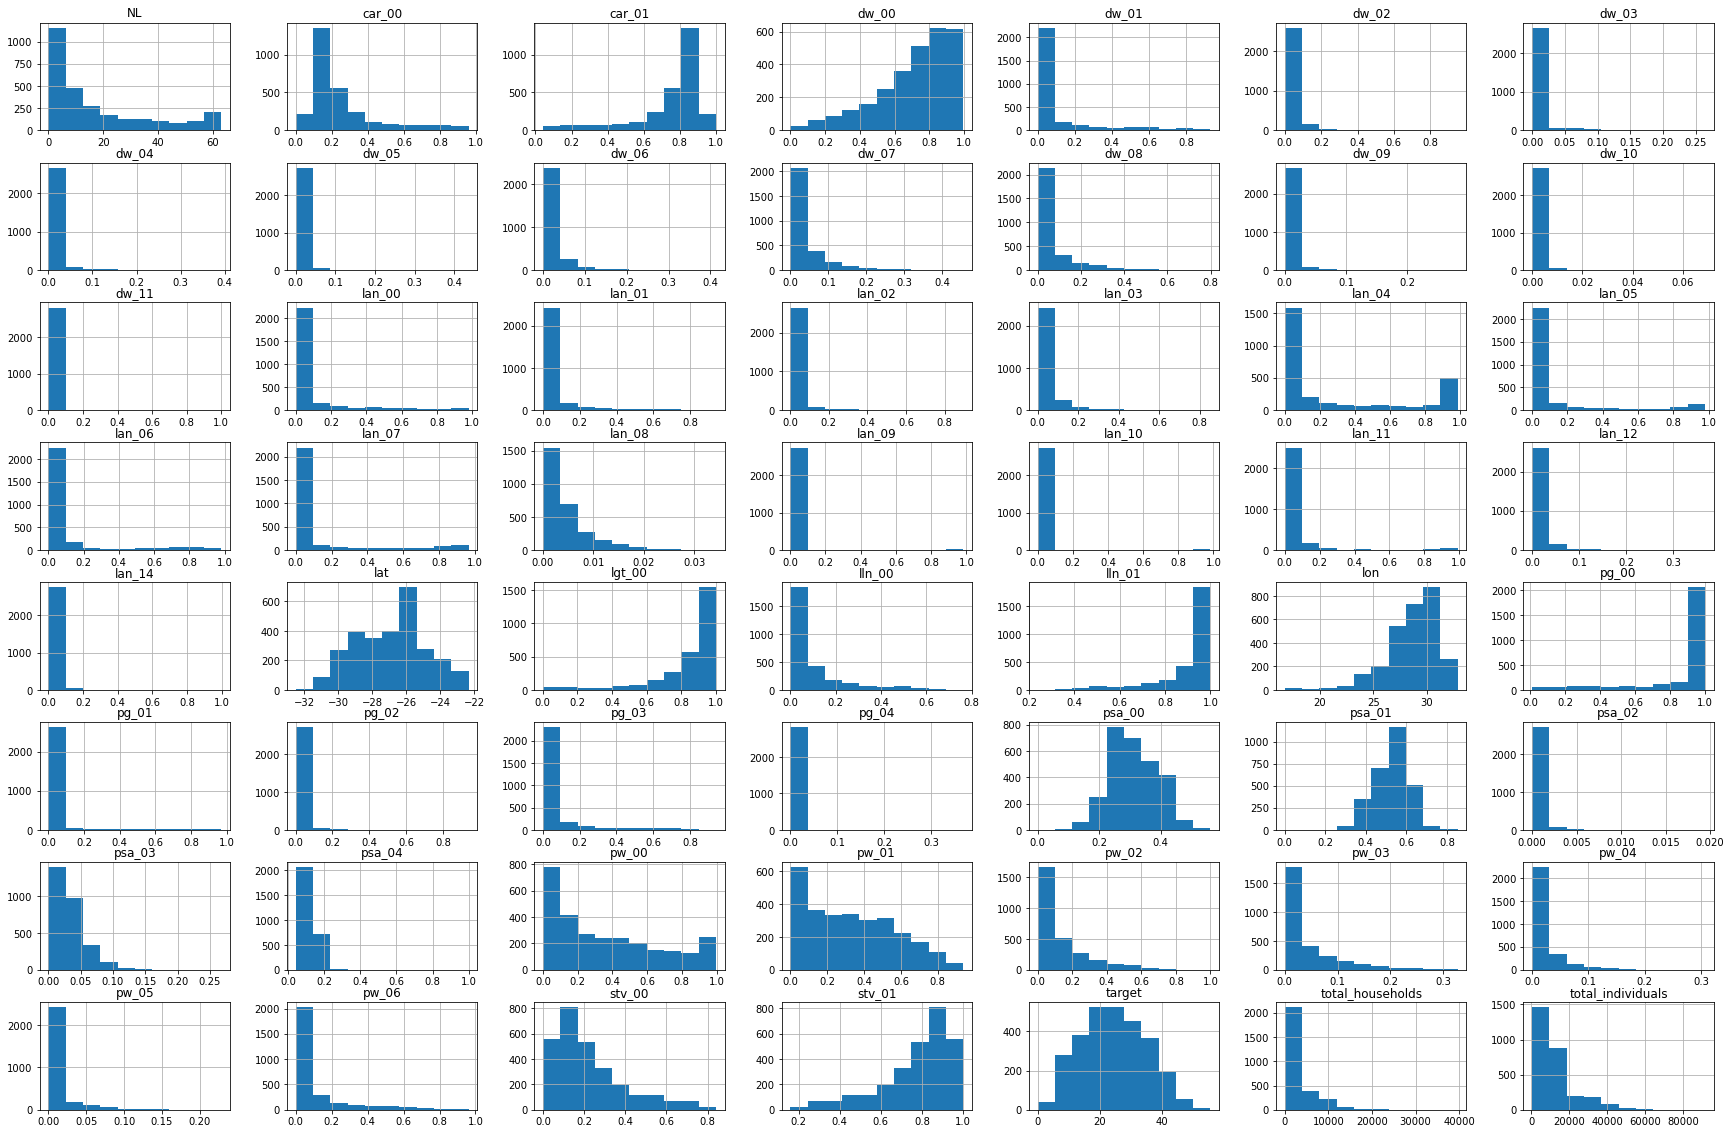

In [81]:

df_cols = df.select_dtypes(include=[np.float])
df_cols.hist(bins=10, figsize=(30,20))
#The graphic below gives us a sense of skews and distribution for each variable
#If there is a small distribution for a variable, that means it does not change much by ward
#However, lets say  dw_00 does change, then 
#Note that we end up finding many variables are insignificant, 
#as in almost all of the population segment is 0.
#so we can exclude those variables. 


In [82]:
#Let's also gleen some information not just about variable-specific distribution,
#but how they correlate with the target value
df.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

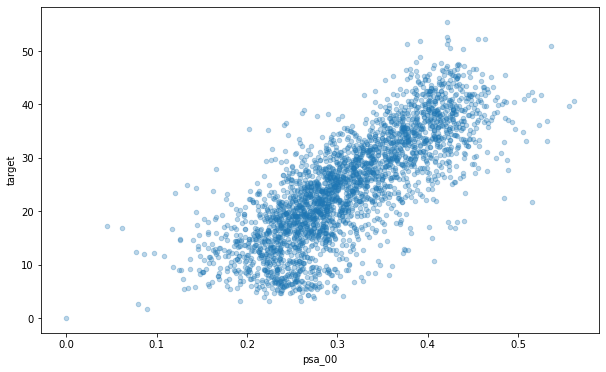

In [83]:
# Note for later: piped water variables seem to hold much significance
# the above shows that psa_00 (lack of school attendance) in particular is an 
# important indicator of whether there is a woman-headed household. That makes sense,
# since that suggests teen pregnancy while the girl is in school
#(and the father perhaps left the wife, unfortunately )
x = df[['target','psa_00','psa_01']]
x.head()

#Let's plot below to reaffirm our suspicions
df.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)


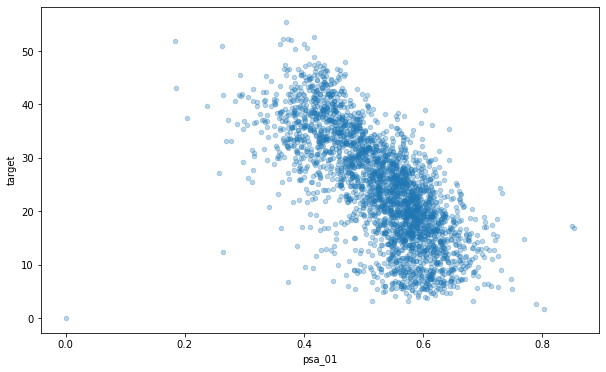

In [84]:
#pretty resounding trend. What about psa_01?
df.plot(x='psa_01', y='target', kind='scatter', alpha=0.3)
#It is the opposite, suggesting that there is an inverse relation 
#between later motherhood and single motherhood

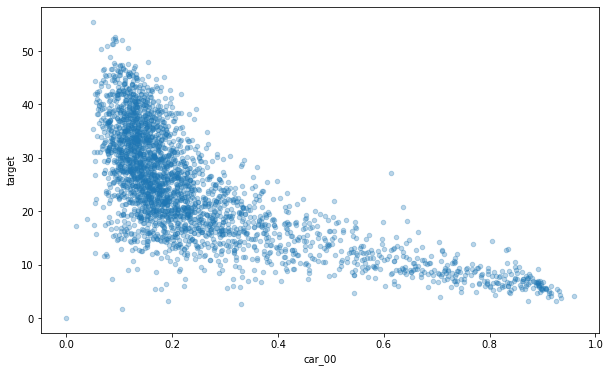

In [85]:
# poverty in general might be another giant indicator. Usually, single-mother households are more impoverished
# and face many challenges--this is a pattern in every country, not just developing ones
# A telltale sign of affluence, especially
# in a developing country like South Africa, is car ownership
df.plot(x='car_00', y='target', kind='scatter', alpha=0.3)
#car_00 is percentage of households owning a car

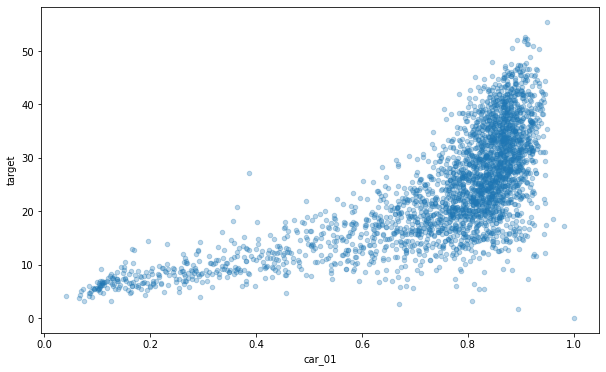

In [86]:
df.plot(x='car_01', y='target', kind='scatter', alpha=0.3)

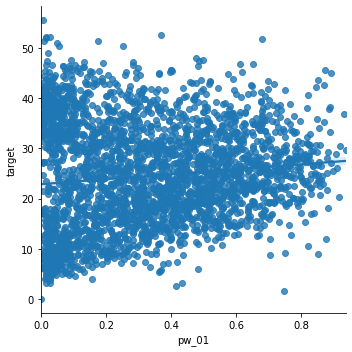

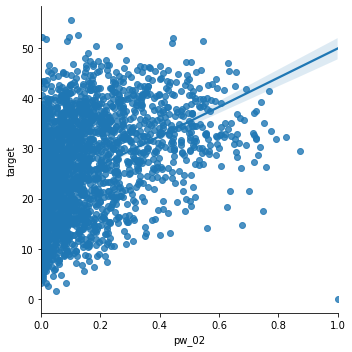

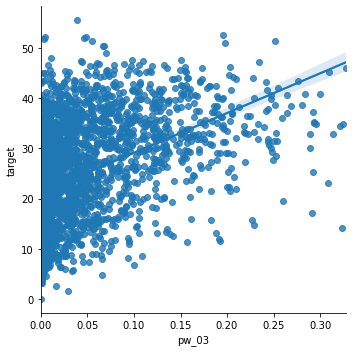

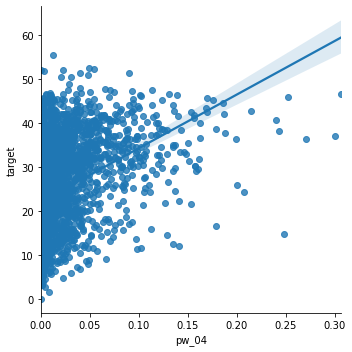

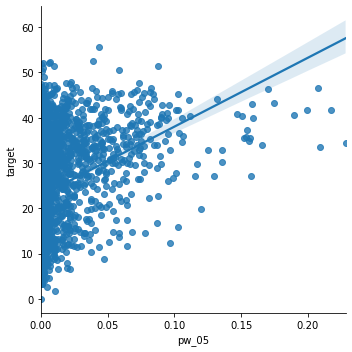

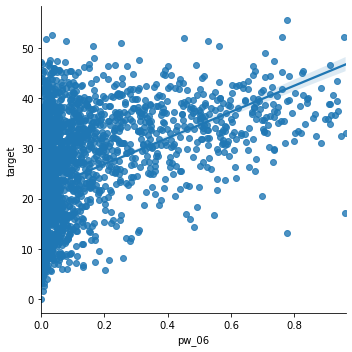

In [87]:
pw_cols = ['pw_01','pw_02','pw_03','pw_04','pw_05','pw_06']
#is there an even clearer relationship as we slowly go from pw_00 (great piped water) to pw_06 (no piped water)?
# I wont rename as the water situation gets worse from pw_01-pw_06

for col in pw_cols:
    sns.lmplot(x=col, y='target', data=df)
    
    
    

In [88]:
#Not as significant a trend as I would have predicted, but:
#pw_02-6  shows clearly that those with high rates of getting 
# their water through bad means (like walking 1 km to get water) have higher target rates
# pw_00, or piped water, has a noticeably smaller correlation than if their water was gotten through worse means

# With these in mind, let's decide to train our ml model on these variables:
## Positive correlators:
psa_00    
car_01    
stv_01      
pw_06
## Negative correlators:
pw_00
NL (night lights)

There are not that many negative correlators offered in data. I am excluding the binary negative correlators 
like car_01--person has a car--since this information is already covered by car_00, 
which I included already. You either have a car or not

EDIT: I am EXCLUDING negative correlators

In [89]:
#Let's go ahead an train our data

In [90]:
X = df[[
'psa_00',
'car_01',
'stv_01',
'pw_06',
'lln_01',
'pw_00', 
'NL'
]]

#print(X)

Y = df['target']
#print(Y)



## Train different types of models

In [117]:
#importing some modules we need

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_validate


# creates a function to run the model and add the (avereaged -MAE scores) to the RESULTS dictionary
def evaluate_model_and_predictions(estimator):    
    cv_results = cross_validate(estimator,
                    X=X,
                    y=Y,
                    scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True,return_estimator=True)
    x = cv_results.pop('estimator')
    m1,m2,m3 = x[0], x[1],x[2]
    m1.fit(X,Y)
    m2.fit(X,Y)
    m3.fit(X,Y)
    predictions = np.mean([m1.predict(X),m2.predict(X),m3.predict(X)],axis=0)
    return pd.DataFrame(cv_results).abs().mean().to_dict(),predictions


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
model_names = ['DecisionTreeRegressor','LinearRegression', 'ElasticNet', 'Lasso', 'Ridge']
models = [DecisionTreeRegressor(),LinearRegression(), ElasticNet(), Lasso(), Ridge()]

def run_models(models):
    results = {}
    predictions = {}
    for i in range(0,len(models)):
        model_name = model_names[i]
        evaluated = evaluate_model_and_predictions(models[i])
        results[model_name] = evaluated[0]
        predictions[model_name] = evaluated[1]
    return results, predictions

RESULTS,PREDICTIONS = run_models(models)

## Visualize Predicted vs Target Values by model in Chart

In [97]:
visualize_scores = pd.DataFrame.from_dict(RESULTS).T
visualize_predictions = pd.DataFrame.from_dict(PREDICTIONS)
visualize_predictions['target'] = Y
visualize_predictions

,DecisionTreeRegressor,LinearRegression,ElasticNet,Lasso,Ridge,target
0,16.773757,18.432085,28.243471,25.257050,18.490844,16.773757
1,21.496661,26.072336,28.381192,27.871093,26.045444,21.496661
2,10.931425,15.984510,29.062690,28.439790,16.816724,10.931425
3,23.119257,22.422402,28.091570,25.376004,22.376882,23.119257
4,13.652252,10.564312,28.145575,25.106855,11.266190,13.652252
...,...,...,...,...,...,...
2817,6.393480,3.998837,25.089834,22.095867,4.918583,6.393480
2818,15.668000,18.117374,28.428889,27.315628,18.666316,15.668000
2819,13.238795,15.117513,27.679357,25.649821,15.644229,13.238795
2820,17.639523,20.212508,27.870757,26.033251,20.316714,17.639523


### Visualize Training Score/Error

In [98]:
visualize_scores

,fit_time,score_time,test_score,train_score
DecisionTreeRegressor,0.016064,0.002259,4.516745,0.000000
LinearRegression,0.004850,0.001844,3.598121,3.368418
ElasticNet,0.004466,0.002586,7.492904,6.643843
Lasso,0.004011,0.002175,6.919712,6.117299
Ridge,0.004461,0.002622,3.640044,3.404109


### Visualize Predictions

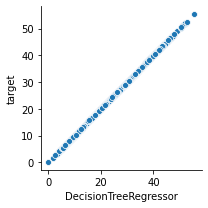

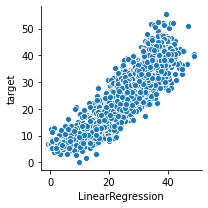

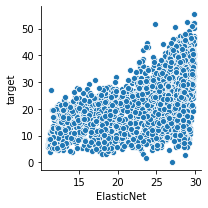

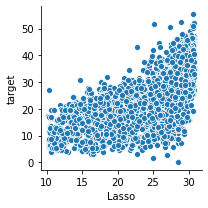

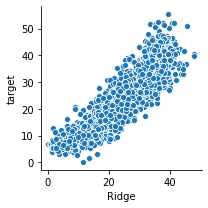

In [99]:
for model_name in model_names: 
    sns.relplot(x=model_name, y="target", data=visualize_predictions, kind="scatter",height=(3))

## More Helper functions

In [100]:
# creates function to display results
def display_results(results):
    results_df  = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
    return results_df


def evaluate_model(model):    
    cv_results = cross_validate(model,
                    X=X,
                    y=Y,
                    scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True,return_estimator=True)
    return pd.DataFrame(cv_results).mean().abs().to_dict()

## Ridge and Linear Regression Are the Best
It seems like these two are nearly identical (not exactly identical though) for predicted outcomes
They are also the best models. Let's try ensemble methods on our highest-performing algorithms

## So let's try RandomizedSearchCV on these two models

In [143]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform 


#First do ridge
ridgeRegression = Ridge()

ridge_search_params = {
    "alpha": uniform(loc=0.1, scale=10), 
    "fit_intercept": [True, False]
}

ridge_random_search = RandomizedSearchCV(
    estimator=ridgeRegression, 
    param_distributions=ridge_search_params,
   scoring="r2", n_jobs=-1, 
    n_iter=50)
ridge_random_search.fit(X, Y)


linear_search_params = { 
    "fit_intercept": [True, False],
    'copy_X':[True,False],
    'normalize':[True,False]
}

#Then do linear regression
linearRegression = LinearRegression()
linear_random_search = RandomizedSearchCV(
    estimator=linearRegression, 
    param_distributions=linear_search_params,
   scoring="r2", n_jobs=-1, 
    n_iter=50)
linear_random_search.fit(X, Y)





/Applications/anaconda3/envs/IX/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(estimator=LinearRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   scoring='r2')

In [144]:
# print("Best Score: ",random_search.best_score_)
# print("Best Estimator: ",random_search.best_score_)
# print("Best Params: ",random_search.best_params_)
RESULTS['Ridge_Randomized_Search'] = evaluate_model(
    ridge_random_search.best_estimator_)
RESULTS['Linear_Randomized_Search'] = evaluate_model(
    linear_random_search.best_estimator_)

## Try bagging with varying number of estimators

In [145]:
#from mlxtend.regressor import StackingRegressor



# estimator_stacking = StackingRegressor(
#     regressors=[
#         DecisionTreeRegressor(),
#         LinearRegression(),
#         ElasticNet()
#     ], 
#     meta_regressor=LinearRegression())
# RESULTS["Stacking"]  = evaluate_model(estimator_stacking)
# bagging_results = display_results(RESULTS)
# bagging_results


from sklearn.ensemble import BaggingRegressor, BaggingClassifier


estimator_bagging_10 = BaggingRegressor(n_estimators=10)
estimator_bagging_100 = BaggingRegressor(n_estimators=50)
estimator_bagging_500 = BaggingRegressor(n_estimators=500)
RESULTS["Bagging_Tree_10_Estimators"] = evaluate_bagging(estimator_bagging_10)
RESULTS["Bagging_Tree_50_Estimators"] = evaluate_bagging(estimator_bagging_50)
RESULTS["Bagging_Tree_500_Estimators"] = evaluate_bagging(estimator_bagging_500)
display_results(RESULTS)
# visualize_scores = pd.DataFrame.from_dict(RESULTS).T
# visualize_scores



,fit_time,score_time,test_score,train_score
DecisionTreeRegressor,0.014346,0.002230,4.560636,0.000000
LinearRegression,0.003937,0.001794,3.598121,3.368418
ElasticNet,0.003736,0.002141,7.492904,6.643843
Lasso,0.003763,0.002257,6.919712,6.117299
Ridge,0.004026,0.002561,3.640044,3.404109
Bagging_Tree_10_Estimators,0.085997,0.004571,3.502212,1.221592
Bagging_Tree_50_Estimators,0.397392,0.013013,3.375137,1.114423
Bagging_Tree_500_Estimators,3.919250,0.108073,3.366093,1.096395
Ridge_Randomized_Search,0.003007,0.001699,3.601090,3.379402
Linear_Randomized_Search,0.002585,0.001626,3.596011,3.373338
